In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

In [4]:
os.listdir(path='.')
listOfFile = os.listdir("./train")
print(listOfFile[0])
x=len(listOfFile)
for i in range(0,x):
    print(listOfFile[i])

Potato___Early_blight
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight


Working with 4137 images
Image examples: 
./train/Potato___Early_blight/13ddd965-db42-4392-9798-fe0ba5ad7928___RS_Early.B 7631.JPG


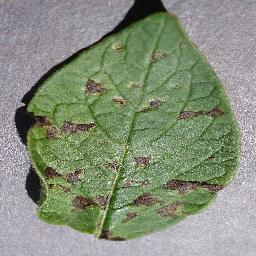

./train/Potato___Early_blight/13e2be1d-56bc-40c6-b5d1-e3bafc1b111e___RS_Early.B 8830.JPG


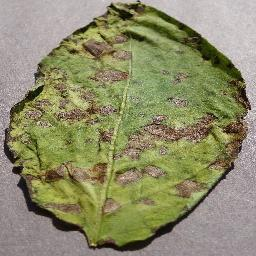

In [5]:
onlyfiles=[]
x=len(listOfFile)
for i in range(0,x):
    folder="./train/"+listOfFile[i]
    print
    onlyfiles2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    for t in range(0, len(onlyfiles2)):
        onlyfiles.append(folder+"/"+onlyfiles2[t])
#onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")
for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=onlyfiles[i], width=256, height=256))

In [6]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import re

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    r1 = re.search(r".+/", _file)
    #label_in_file = _file.find("_")
    y_train.append(r1.group())
    i=i+1
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 256
image_height = 256
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(_file)  # this is a PIL image   #listoffile yerinde folder vardı  listOfFile[i] + "/" +
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 64, 64))
    # Normalize
    #x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 3000 == 0:
        print("%d images to array" % i)
print("All images to array!")

Using TensorFlow backend.


Files in train_files: 4137
3000 images to array
All images to array!


In [7]:
print("Files in train_files: %d" % len(train_files))
print("Files in y_train: %d" % len(y_train))

Files in train_files: 4137
Files in y_train: 4137


In [8]:
#y_train=np.array(y_train)
#np.save('y_train.npy',y_train)
#np.save('dataset.npy', dataset)
#dataset=np.load('dataset.npy')

In [3]:
dataset=np.load('dataset.npy')
y_train=np.load('y_train.npy')

print(y_train[0])
print(max(y_train))
#print(len(y_train))
dataset[4]

./train/Potato___Early_blight/
./train/Tomato___healthy/


array([[[187., 186., 200., ..., 180., 193., 176.],
        [174., 187., 161., ..., 182., 167., 160.],
        [176., 156., 152., ..., 143., 141., 154.],
        ...,
        [124.,  28., 120., ..., 102., 224., 214.],
        [103., 195., 184., ...,  14.,  18.,   3.],
        [196., 193., 204., ..., 103.,  20., 118.]],

       [[135.,  41., 127., ..., 101., 221., 215.],
        [105., 216., 214., ...,  14.,  17.,  10.],
        [185., 182., 193., ..., 113.,  32.,  94.],
        ...,
        [ 84., 157., 185., ..., 164., 159., 165.],
        [187., 183., 182., ..., 167.,  74., 172.],
        [176.,  91., 170., ...,  72., 148., 171.]],

       [[ 57., 143., 165., ..., 151., 145., 155.],
        [194., 185., 204., ..., 171.,  68., 160.],
        [172.,  72., 168., ...,  90., 153., 167.],
        ...,
        [160., 158., 172., ..., 144., 155., 144.],
        [140., 155., 152., ..., 152., 119., 115.],
        [129., 146., 142., ..., 131., 128., 139.]]], dtype=float32)

In [4]:
from sklearn.model_selection import train_test_split

#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
#print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3309, 3, 64, 64)
x test:  (828, 3, 64, 64)
y train:  (3309,)
y test:  (828,)


In [6]:
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
print(number_of_train,number_of_test)

3309 828


In [5]:
#reshape data to fit model
from keras.utils import to_categorical
x_train = X_train.reshape(3309,64,64,3)
x_test = X_test.reshape(828,64,64,3)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
y_train = pd.Categorical(y_train).codes
y_test = pd.Categorical(y_test).codes

Using TensorFlow backend.


x train:  (3309, 64, 64, 3)
x test:  (828, 64, 64, 3)


In [7]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (3309, 12288)
X test flatten (828, 12288)


In [8]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (12288, 3309)
x test:  (12288, 828)
y train:  (3309,)
y test:  (828,)


# lineer regression


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":(1,2),"penalty":["l1","l2"]},    #np.logspace
logistic_regression=LogisticRegression(random_state=21)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=2)
log_reg_cv.fit(x_train.T,y_train.T)
#logistic_regression.fit(x_train.T,y_train.T)

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=21, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=({'C': (1, 2), 'penalty': ['l1', 'l2']},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=21, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=({'C': (1, 2), 'penalty': ['l1', 'l2']},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
       
best hyperparameters:  {'C': 1, 'penalty': 'l2'}
best accuracy:  0.6884255061952251


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=21, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("best accuracy: ", log_reg_cv.best_score_)
#print("best hyperparameters: ", logistic_regression.best_params_)
#print("accuracy: ", logistic_regression.best_score_)
#logistic_regression.score()  #.predict(x_test[5].reshape(-1,1))

best hyperparameters:  {'C': 1, 'penalty': 'l2'}
best accuracy:  0.6884255061952251


In [21]:
log_reg= LogisticRegression(C=1,penalty="l2")
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))
predictions = log_reg.predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

test accuracy: 1.0 
train accuracy: 1.0 


ValueError: X has 828 features per sample; expecting 12288

# lojistic regression with functions

In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

In [ ]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 2)